In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [14]:
df = pd.read_excel('rel_op.xlsx')
df 

,,r(cm),i (µA)
0,NaN,14.2,70.0
1,NaN,19.2,48.0
2,NaN,24.2,33.6
3,NaN,29.2,24.0
4,NaN,34.2,19.0
5,NaN,39.2,14.0
6,NaN,44.2,11.0
7,NaN,49.2,9.0
8,NaN,54.2,7.0
9,NaN,59.2,6.0


#DADOS (µ = 10**-6 A)

In [15]:
r = np.array(df.iloc[:,1])  #r em cm
print(r)
print(r.size)

[14.2 19.2 24.2 29.2 34.2 39.2 44.2 49.2 54.2 59.2 64.2 69.2 74.2 79.2
 84.2 89.2]
16


In [16]:
i = np.array(df.iloc[:,2]) #i em microampere
print(i) 

[70.  48.  33.6 24.  19.  14.  11.   9.   7.   6.   5.   4.   3.5  3.5
  3.   2.5]


In [17]:
r_samp = np.reshape(r,-1)
i_samp = np.reshape(i,-1)
print(r_samp)
print(i_samp)

[14.2 19.2 24.2 29.2 34.2 39.2 44.2 49.2 54.2 59.2 64.2 69.2 74.2 79.2
 84.2 89.2]
[70.  48.  33.6 24.  19.  14.  11.   9.   7.   6.   5.   4.   3.5  3.5
  3.   2.5]


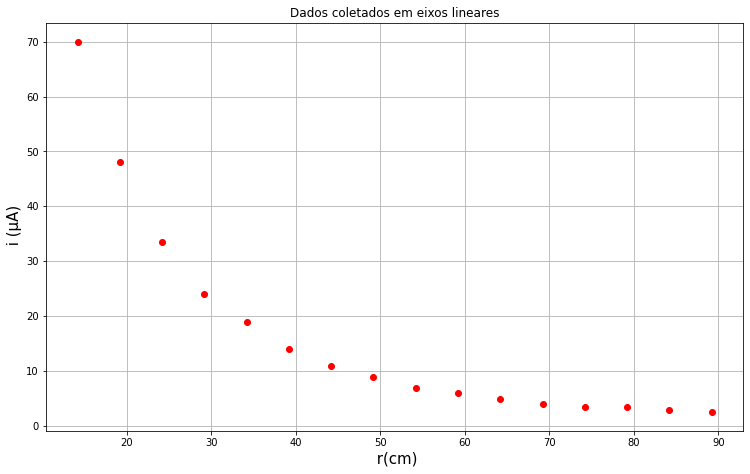

In [27]:
plt.figure(figsize=(12.5,7.5))
plt.plot(r_samp,i_samp,'o', color='red')
plt.xlabel(' r(cm)', fontsize=15)
plt.grid(True, which='both')
plt.ylabel(' i (µA)', fontsize=15)
plt.title('Dados coletados em eixos lineares')
plt.show()

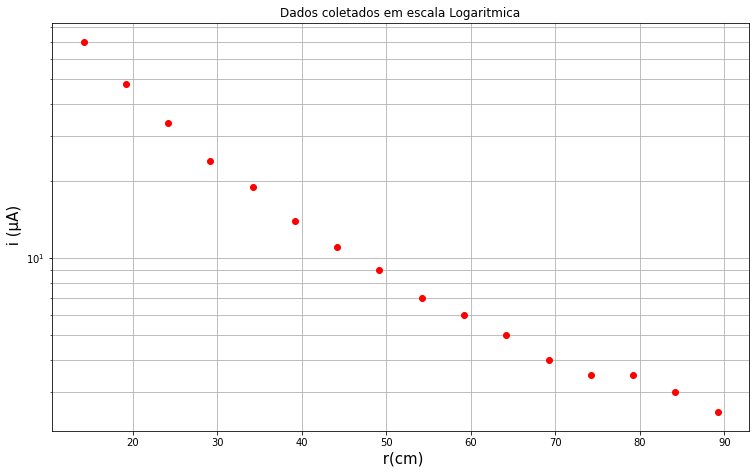

In [26]:
plt.figure(figsize=(12.5,7.5))
plt.plot(r_samp,i_samp,'o', color='red')
plt.yscale('log')
plt.grid(True, which='both')
plt.xlabel(' r(cm)',fontsize=15)
plt.ylabel(' i (µA)',fontsize=15)
plt.title('Dados coletados em escala Logaritmica')
plt.show()

In [21]:
# log i = C + n*log(r)

In [33]:
X = np.log10(r)
Y = np.log10(i)
mod_linear = np.polyfit(X,Y,1)
n = float(mod_linear[0])
b = float(mod_linear[1])
print('n =  {:.3f}'.format(n))
print('C =  {:.2f}'.format(b))
print(X)

n =  -1.879
C =  4.10
[1.15228834 1.28330123 1.38381537 1.46538285 1.53402611 1.59328607
 1.64542227 1.6919651  1.73399929 1.77232171 1.80753503 1.84010609
 1.87040391 1.89872518 1.92531209 1.95036485]


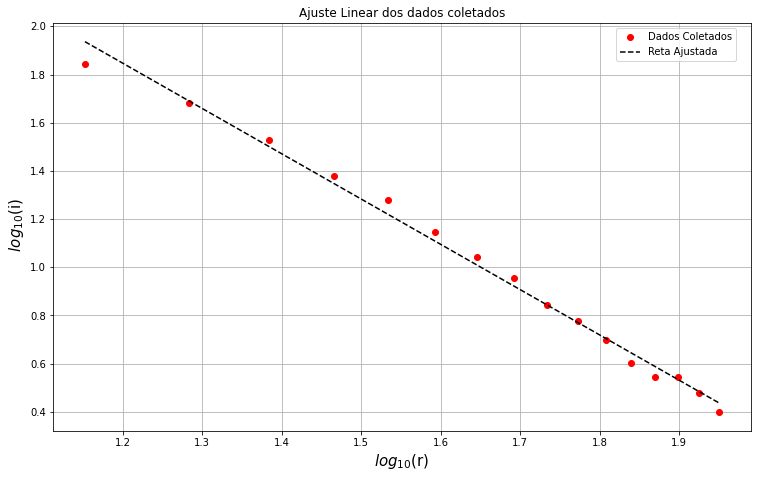

In [32]:
y_mod = n*X + b 
plt.figure(figsize=(12.5,7.5))
plt.plot(X,Y,"o", label='Dados Coletados', color='red')
plt.plot(X,y_mod, "--", label='Reta Ajustada', color='black')
plt.xlabel('$log_{10}$(r)',fontsize=15)
plt.grid(True, which='both')
plt.ylabel(' $log_{10}$(i)',fontsize=15)
plt.title('Ajuste Linear dos dados coletados')
plt.legend(bbox_to_anchor = (0.8, 1),loc=2)
plt.show()

In [24]:
yresid = Y - y_mod
SQresid = sum(yresid**2)
y_tot = Y- np.mean(Y)
SQtotal = sum(y_tot**2)
R2 = 1 - SQresid/SQtotal
print ('coeficiente de determinação do ajuste é {}'.format(np.round(R2,3)))

coeficiente de determinação do ajuste é 0.993
